# Tutorial on Machine Learning Methods

## Univariate Linear Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Example data: X (input feature) and y (output)
X = np.array([[1], [2], [3], [4], [5]])  # Independent variable
y = np.array([1.5, 3.1, 4.5, 6.2, 7.9])  # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predicted = model.predict(X)

# Plot the data and regression line
plt.scatter(X, y, color='blue', label='Original Data')  # Scatter plot for original data
plt.plot(X, predicted, color='red', label='Regression Line')  # Regression line

# Add labels and legend
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Linear Regression Example')
plt.legend()

# Display the plot
plt.show()

# Display the results
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Predicted values:", predicted)

## Mutivariate Linear Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Example data: X (input features) and y (output)
# Two independent variables (features)
X = np.array([[1, 2], [2, 1], [3, 4], [4, 3], [5, 6]])  # Independent variables
y = np.array([1.8, 3.2, 5.6, 7.3, 9.1])  # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predicted = model.predict(X)

# Display the results
print("Coefficients (slopes):", model.coef_)
print("Intercept:", model.intercept_)
print("Predicted values:", predicted)

# Plotting a multivariable regression is challenging since it involves more than two dimensions.
# However, for illustration, we can visualize the actual vs. predicted values.

plt.scatter(range(len(y)), y, color='blue', label='Actual Values')  # Original data
plt.scatter(range(len(predicted)), predicted, color='red', label='Predicted Values')  # Predicted values

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('y (Dependent Variable)')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Display the plot
plt.show()


## Classification

### Show Iris data set in a matrix with headers

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for the dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column with species names
iris_df['species'] = [iris.target_names[target] for target in iris.target]

# Display the first few rows of the dataset
print(iris_df)

## DecisionTreeClassifier

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset (a classic dataset for classification tasks)
iris = load_iris()
X = iris.data  # Features (petal and sepal measurements)
y = iris.target  # Target (species of iris plant)

# Convert class names to a list
class_names = list(iris.target_names)

# Create and fit the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()


## Random Forest

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (species of iris plant)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create and fit the Random Forest Classifier
model = RandomForestClassifier(n_estimators=1, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


## Logistic Regression 

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Compute confusion matrix and display it
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


## Support Vector Machine
SVM Model: The SVC class with a linear kernel (kernel='linear') is used to create a linear decision boundary. You can use other kernels like 'rbf' for non-linear data.
Decision Boundary Plot: Similar to logistic regression, the contour plot visualizes the separation between the two classes, created by the SVM model.
Confusion Matrix: The ConfusionMatrixDisplay visualizes how well the SVM model performed on the test data.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the SVM model
model = SVC(kernel='rbf', gamma='scale', random_state=42)
# model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Compute confusion matrix and display it
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


## XGBoost (Extreme Gradient Boosting)
XGBoost is an efficient implementation of gradient-boosted decision trees, for classification. 
We'll use the Iris dataset, consisting of three classes of iris plants.

DMatrix: XGBoost uses a special data structure called DMatrix, which is optimized for faster computations.

Parameters:
- objective="multi:softmax" specifies multi-class classification.
- num_class=3 corresponds to the three classes in the Iris dataset.
- max_depth=4 controls the complexity of the trees.
- eta=0.3 is the learning rate that controls the step size in optimization.

Feature Importance: The xgb.plot_importance() function visualizes how important each feature is for making predictions.
Evaluation: Accuracy is used to measure how well the model performs on the test data

In [ ]:
# Intall XGBoost if not available
pip install xgboost

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (species of iris plant)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create DMatrix for XGBoost (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    "objective": "multi:softmax",  # Multi-class classification
    "num_class": 3,               # Number of classes (setosa, versicolor, virginica)
    "max_depth": 4,               # Maximum depth of trees
    "eta": 0.3,                   # Learning rate
    "seed": 42                    # Random seed
}

# Train the XGBoost model
num_round = 50  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Feature importance plot
xgb.plot_importance(bst)
plt.title("Feature Importance")
plt.show()


## LightGBM (Light Gradient Boosting Machine) 
a high-performance gradient boosting framework, for classification.
The Iris dataset is used, which contains three classes of iris plants.

LightGBM Dataset: lgb.Dataset() creates a special data format optimized for LightGBM.

Model Parameters:
- objective="multiclass": Specifies that this is a multi-class classification problem.
- num_class=3: There are three output classes.
- Other parameters like learning_rate and num_leaves control the boosting process.

Training: The model is trained for up to 100 iterations, with early stopping to prevent overfitting.

Predictions: Since LightGBM outputs probabilities for each class, the predicted class is the one with the highest probability.

Feature Importance: lgb.plot_importance() visualizes the most important features used in the model

In [ ]:
# Install latest LightGBM if not available
pip install --upgrade lightgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

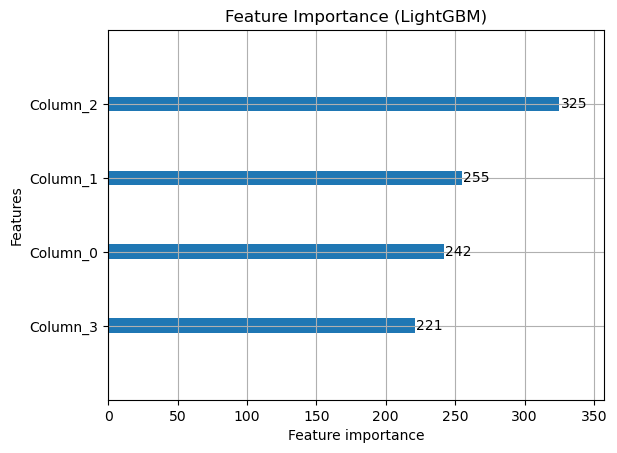

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (species of iris plant)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LightGBM model
model = LGBMClassifier(
    objective="multiclass",
    num_class=3,              # Number of classes
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100          # Maximum boosting rounds
)

# Train the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="multi_logloss")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Plot feature importance
lgb.plot_importance(model, max_num_features=10)
plt.title("Feature Importance (LightGBM)")
plt.show()

## K-Means Clustering algorithm
This example demonstrates how K-Means identifies and groups data points into clusters.

We use make_blobs to generate a dataset with 300 data points, grouped into 3 centers (clusters).

K-Means Clustering:
- KMeans is initialized with n_clusters=3, indicating the algorithm will group the data into 3 clusters.
- The algorithm assigns each data point to one of the clusters.

Visualization: 
- The first plot shows the unclustered data.
- The second plot displays the data points with cluster assignments (colored by label) and the cluster centers (red "X" markers).



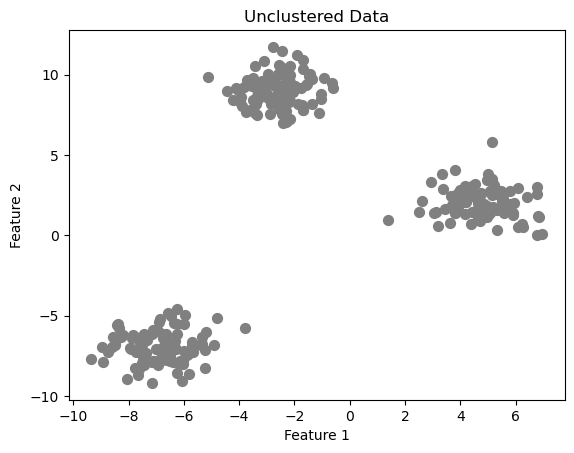

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


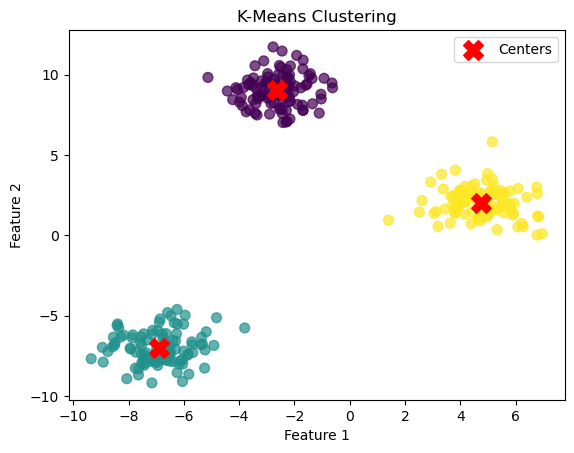

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a synthetic dataset
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title("Unclustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify 3 clusters
kmeans.fit(X)  # Fit the model to the data

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)  # Data points with cluster labels
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centers')  # Cluster centers
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
DBSCAN is a clustering algorithm used to group data points based on their density. Unlike other clustering algorithms like K-Means, DBSCAN does not require to specify the number of clusters in advance and can handle clusters of arbitrary shapes. It’s especially good at identifying noise (outliers) in the data


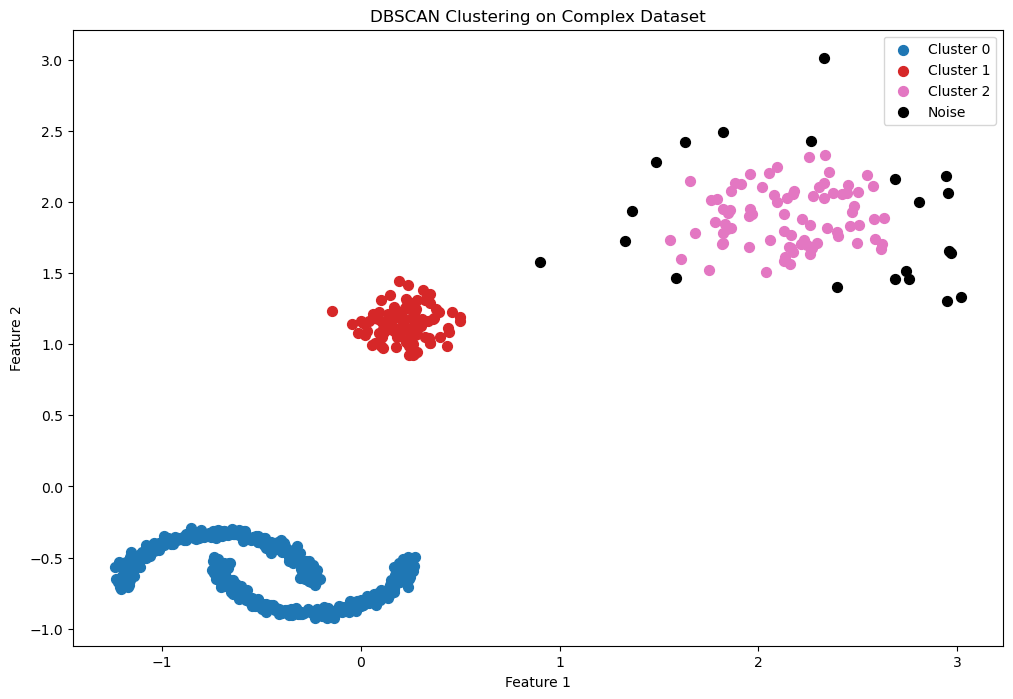

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate a complex dataset with non-linear shapes and varying densities
X1, _ = make_moons(n_samples=500, noise=0.05, random_state=42)  # Moon-shaped clusters
X2, _ = make_blobs(n_samples=200, centers=[[2, 5], [6, 7]], cluster_std=[0.3, 0.8], random_state=42)  # Circular clusters
X = np.vstack((X1, X2))  # Combine the datasets

# Standardize the data (DBSCAN works better on standardized data)
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)  # Adjust parameters for this dataset
labels = dbscan.fit_predict(X)  # Perform clustering

# Plot the results
plt.figure(figsize=(12, 8))
unique_labels = set(labels)  # Get unique cluster labels
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points are labeled as -1
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (labels == k)  # Boolean mask for the current cluster
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], color=tuple(col), s=50, label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Complex Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# K-Nearest Neighbors (KNN) classification
The make_blobs function generates a synthetic dataset with 3 classes.
The data is split into training and testing sets using train_test_split().

KNN Model:
- The KNeighborsClassifier is initialized with n_neighbors=5 (you can adjust this value to experiment).
- The model predicts the class of each test sample based on the majority vote of its 5 nearest neighbors.

Evaluation: The accuracy_score function calculates the accuracy of predictions on the test set.

Visualization: The decision boundary is plotted to show how the KNN classifier separates the data into different classes.

Test points are displayed with their actual class labels.

KNN Test Accuracy (k=5): 1.0


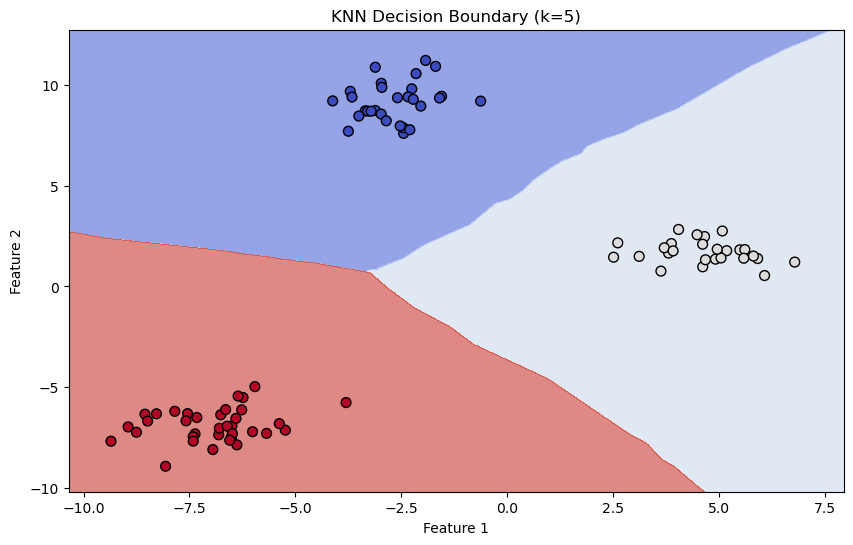

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy (k={k}): {accuracy}")

# Visualize the decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm', s=50)
plt.title(f"KNN Decision Boundary (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Comparison of Clustering Methods
Use a synthetic dataset and apply the following clustering algorithms:
- K-Means: Partitional clustering based on minimizing within-cluster variance.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Density-based clustering that identifies clusters and noise.
- Agglomerative Clustering (Hierarchical): Hierarchical approach that merges clusters iteratively.
- Mean-Shift: Clustering based on finding modes in the density of data points.
- Gaussian Mixture Model (GMM): Probabilistic model assuming data is generated from a mixture of Gaussian distributions.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


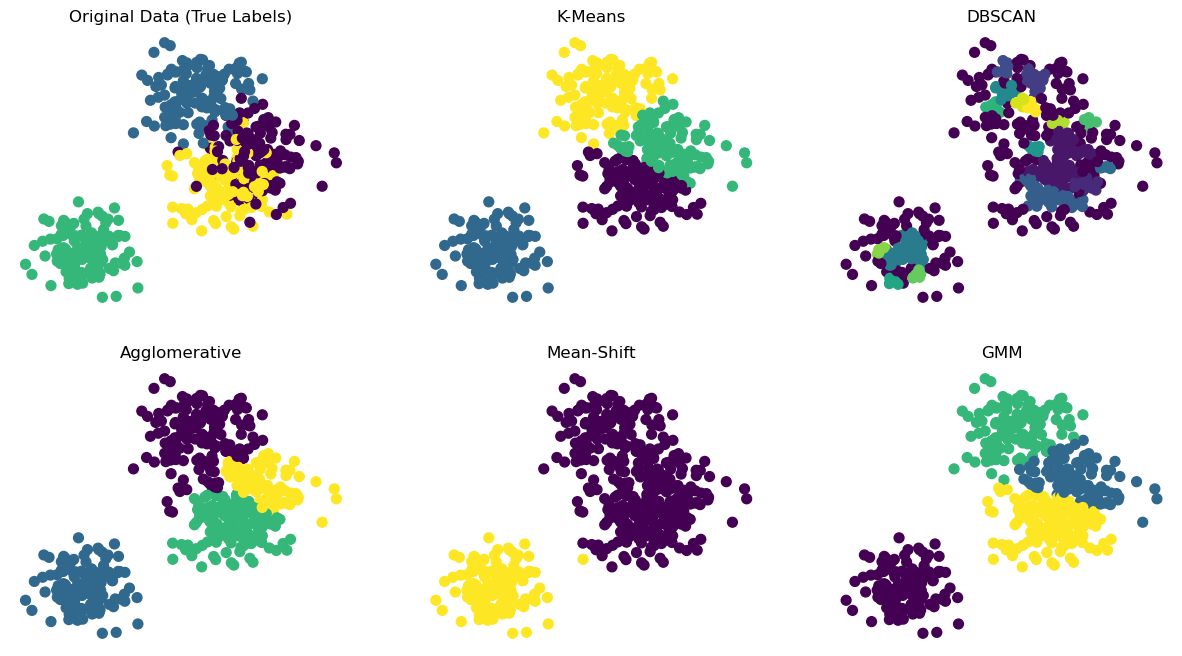

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


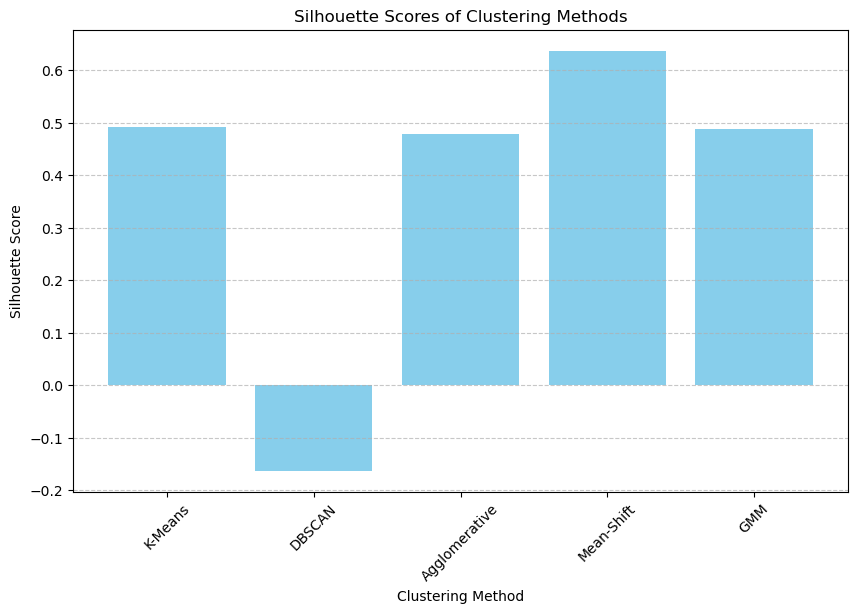

K-Means: Silhouette Score = 0.49
DBSCAN: Silhouette Score = -0.16
Agglomerative: Silhouette Score = 0.48
Mean-Shift: Silhouette Score = 0.64
GMM: Silhouette Score = 0.49


In [30]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Generate a synthetic dataset
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=2.0, random_state=142)

# Create a dictionary of clustering models
clustering_algorithms = {
    "K-Means": KMeans(n_clusters=4, random_state=42),
    "DBSCAN": DBSCAN(eps=0.6, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=4),
    "Mean-Shift": MeanShift(),
    "GMM": GaussianMixture(n_components=4, random_state=42)
}

# Plot the original data for reference
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("Original Data (True Labels)")
plt.axis("off")

# Apply each clustering algorithm and visualize the results
for i, (name, model) in enumerate(clustering_algorithms.items(), start=2):
    if name == "GMM":  # GMM requires a separate `predict` step
        labels = model.fit(X).predict(X)
    else:
        labels = model.fit_predict(X)
    
    plt.subplot(2, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"{name}")
    plt.axis("off")

#plt.tight_layout()
plt.show()

# Initialize a dictionary to store silhouette scores
silhouette_scores = {}

# Apply each clustering algorithm and calculate silhouette score
for name, model in clustering_algorithms.items():
    if name == "GMM":  # GMM requires a separate `predict` step
        labels = model.fit(X).predict(X)
    else:
        labels = model.fit_predict(X)
    
    # Calculate the silhouette score (only if there is more than one cluster)
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1  # Assign -1 if only one cluster is found
    silhouette_scores[name] = score

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
methods = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())
plt.bar(methods, scores, color='skyblue')
plt.title('Silhouette Scores of Clustering Methods')
plt.ylabel('Silhouette Score')
plt.xlabel('Clustering Method')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the scores for comparison
for method, score in silhouette_scores.items():
    print(f"{method}: Silhouette Score = {score:.2f}")


## OneHotEncoder - Transforms categories into binary columns 
- sparse=False ensures the result is a dense array rather than a sparse matrix. 

Output: Each row corresponds to a single input value, encoded as a binary vector.

Applications: 
- Used in preprocessing categorical data for machine learning models. 
- Common in linear models or distance-based models (like KNN) where numerical representation matters. 
- Helps avoid issues like treating categories as ordinal values.


In [2]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import OneHotEncoder

categories = np.array([['Red'], ['Green'], ['Blue'], ['Red'], ['Blue']])
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Apply One-Hot Encoding
one_hot_encoded = encoder.fit_transform(categories)
# Print the result
print("Original Categories:")
print(categories)
print("\nOne-Hot Encoded Data:")
print(one_hot_encoded)


Original Categories:
[['Red']
 ['Green']
 ['Blue']
 ['Red']
 ['Blue']]

One-Hot Encoded Data:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Self Organizing Maps

A Self-Organizing Map (SOM) is a type of artificial neural network used for unsupervised learning. It projects high-dimensional data into a lower-dimensional (usually 2D) grid while preserving the topological structure of the data. SOMs are commonly used for clustering, visualization, and dimensionality reduction.

In the example bellow, we use a synthetic dataset with 3 clusters generated using make_blobs.

MiniSom:
- MiniSom is used to initialize and train a 10x10 SOM grid.
- Parameters like sigma (neighborhood radius) and learning_rate control how the SOM learns.

Training:
- The SOM is trained for 100 iterations using train_random.

Visualization:
- The U-Matrix (Unified Distance Matrix) visualizes the distance between neurons on the SOM grid.
- Cluster relationships can also be visualized by projecting the input data onto the grid.

In [1]:
# Install MiniSom library (if not already installed)
# !pip install minisom

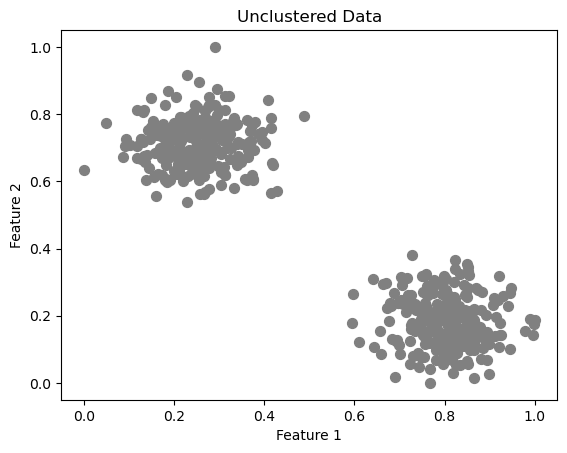

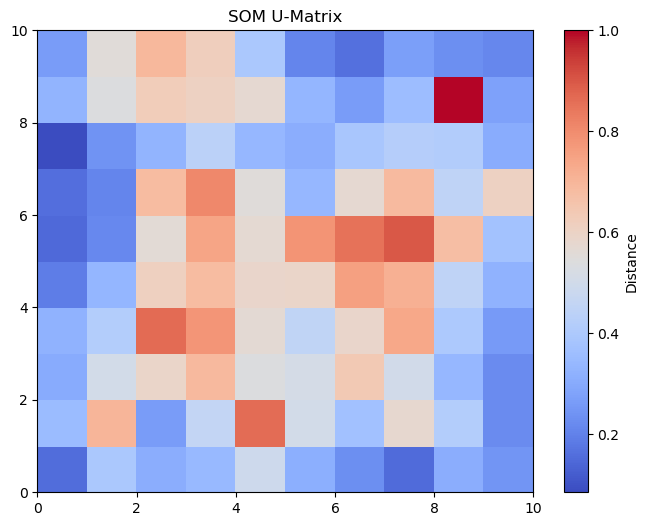

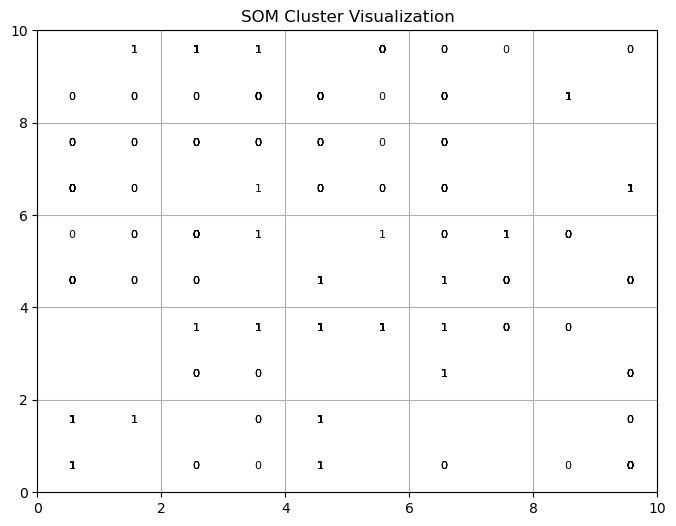

In [13]:
# Import necessary libraries
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a synthetic dataset
data, labels = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)

# Normalize the data
data_min, data_max = data.min(axis=0), data.max(axis=0)
data = (data - data_min) / (data_max - data_min)

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.8, random_seed=42)

# Randomly initialize the weights
som.random_weights_init(data)

# Train the SOM
som.train_random(data, num_iteration=100)

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], s=50, c='gray')
plt.title("Unclustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Visualize the SOM using a distance map (U-matrix)
plt.figure(figsize=(8, 6))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Distance map as a heat map
plt.colorbar(label='Distance')
plt.title("SOM U-Matrix")
plt.show()

# Visualize clusters
plt.figure(figsize=(8, 6))
for i, point in enumerate(data):
    w = som.winner(point)  # Get the winning neuron
    plt.text(w[0] + 0.5, w[1] + 0.5, str(labels[i]), color='black', fontsize=8)
plt.title("SOM Cluster Visualization")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.grid()
plt.show()


## Fuzzy Logic

Fuzzy logic is a mathematical approach to reasoning that resembles human decision-making by allowing for approximate values and reasoning rather than fixed, binary "true/false" logic. It’s widely used in control systems, pattern recognition, and machine learning. Unlike traditional binary logic, fuzzy logic deals with degrees of truth, where values range between 0 and 1.

Key Concepts in Fuzzy Logic:
- Fuzzy Sets: Represent data with degrees of membership rather than crisp boundaries. For example, "warm" can range between 20°C and 30°C, but some temperatures may partially belong to this set (e.g., 25°C might have a membership value of 0.8).
- Membership Functions: Define how each input maps to a membership value in the range [0, 1].
- Rules: Fuzzy logic systems use "if-then" rules like "If temperature is warm, then fan speed is medium."
- Defuzzification: Converts fuzzy output into a crisp value (e.g., exact fan speed).


In [17]:
# Installa Fuzzy Logic Library if not available
# !pip install scikit-fuzzy

### Fuzzy Logic Example

   
Define Variables: Temperature (input) and Fan Speed (output) are defined as fuzzy variables with specified ranges.

Membership Functions: Each variable has membership functions defining "cold," "warm," etc., using triangular shapes (trimf).

Rules: The fuzzy rules determine how temperature influences fan speed.

Control System Simulation: Fuzzy logic determines the fan speed for a given input temperature (e.g., 28°C).

Visualization: Plots show membership functions and the computed result.

Output:
The program prints the calculated fan speed for the input temperature.

Membership functions and the resulting decision are visualized.

This example demonstrates how fuzzy logic can handle imprecise inputs and make smooth, human-like decisions.

Fan Speed: 41.9598997493734


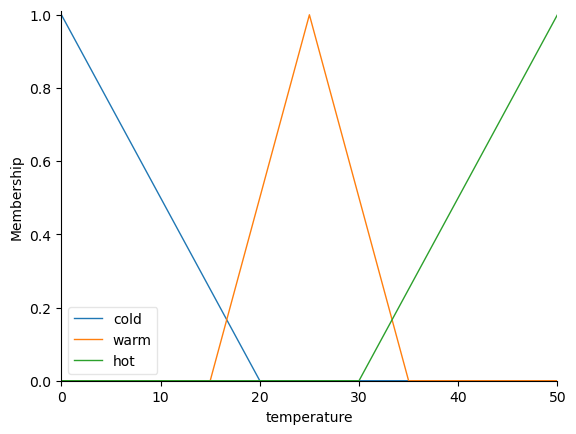

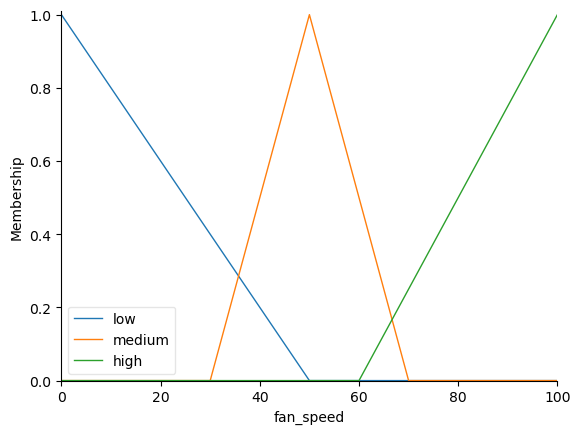

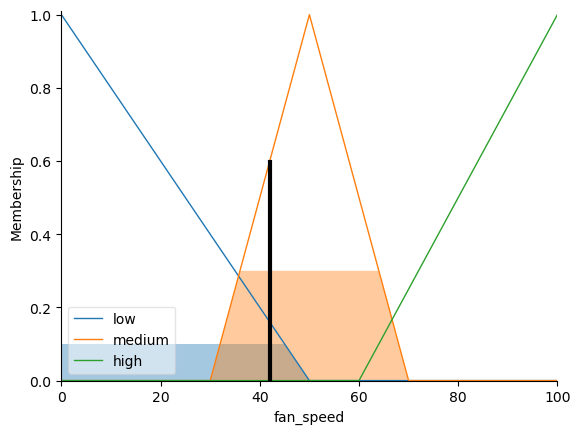

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define membership functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])

# Create control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan = ctrl.ControlSystemSimulation(fan_ctrl)

# Simulate
fan.input['temperature'] = 18  # Input temperature
fan.compute()
print(f"Fan Speed: {fan.output['fan_speed']}")

# Visualize results
temperature.view()
fan_speed.view()
fan_speed.view(sim=fan)

plt.show()


# Principal Component Analysis (PCA) 

Dataset: The Iris dataset is used, which contains measurements of flowers (e.g., sepal length and petal length) with three classes (species).

- PCA reduces the data from 4 dimensions (features) to 2 dimensions, while retaining as much variance as possible.
- The PCA object is initialized with n_components=2, specifying we want 2 principal components.

Visualization: The transformed data (X_pca) is plotted in a 2D space, with points colored according to their class labels.

Interpretation: The plot helps to visualize how well the classes are separated in the reduced 2D feature space

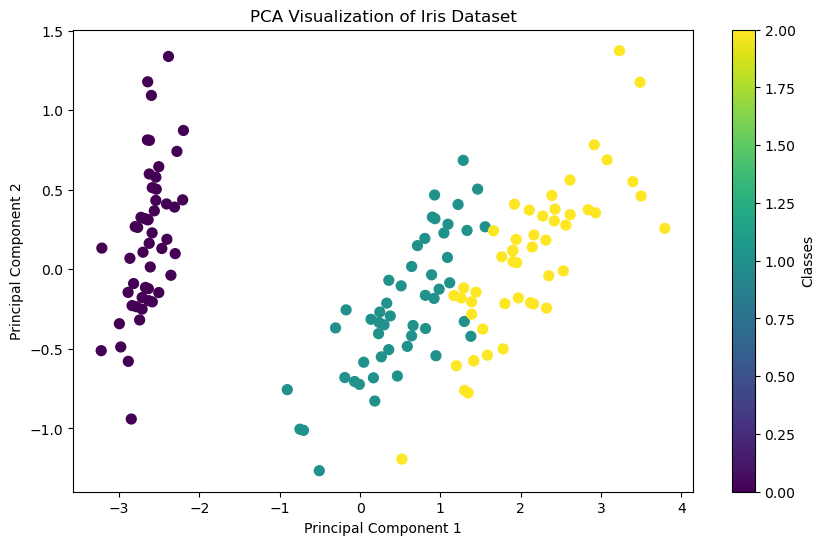

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title('PCA Visualization of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Classes')
plt.show()


## Explaning the Variance with PCA

Explained Variance Ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


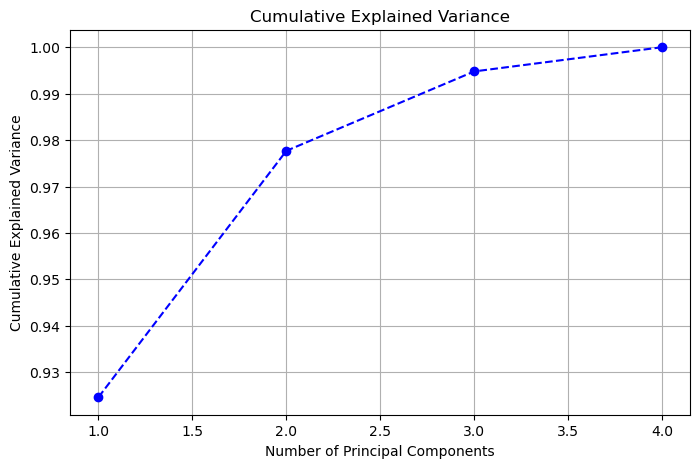

In [2]:
# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Apply PCA
pca = PCA(n_components=None)  # Keep all components for explained variance analysis
X_pca = pca.fit_transform(X)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the cumulative explained variance
import matplotlib.pyplot as plt
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


# PCA for image compression

The image is loaded and converted to grayscale for simplicity. 
- You can use your own image file by replacing the URL.
- Save an image file (e.g., image.png) to your working directory.

PCA Compression: 
- The image is treated as a 2D array where each row corresponds to the pixel intensities.
- PCA is applied to reduce the dimensionality to a fixed number of components (num_components).

Reconstruction: Using the inverse transformation, the image is reconstructed from the principal components.

Visualization: The original and compressed images are displayed to observe the effects of compression.

Adjusting Compression:
- Lowering num_components reduces the size of the image representation but also removes more details.
- Increasing num_components preserves more details but reduces the compression level.

This method is great for compressing images while retaining most of the visual information.

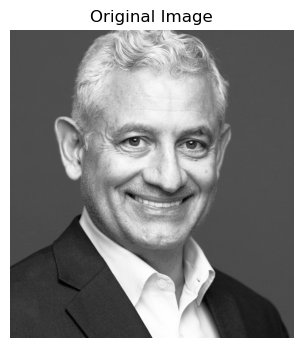

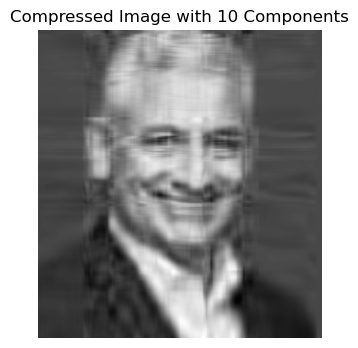

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io

# Load a local grayscale image (replace 'image.png' with your file name)
image = io.imread('image.png', as_gray=True)

# Display the original image
plt.figure(figsize=(8, 4))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Apply PCA to compress the image
def compress_image(image, num_components):
    # Flatten the image into a 2D array (rows = pixels, columns = features)
    pca = PCA(n_components=num_components)
    transformed = pca.fit_transform(image)
    reconstructed = pca.inverse_transform(transformed)  # Reconstruct the image
    return reconstructed

# Compress the image with reduced components
num_components = 10  # Number of principal components
compressed_image = compress_image(image, num_components)

# Display the compressed image
plt.figure(figsize=(8, 4))
plt.imshow(compressed_image, cmap='gray')
plt.title(f"Compressed Image with {num_components} Components")
plt.axis('off')
plt.show()

# PCA for Optimum Image Compression
- Perform PCA 
- Calculates the file size before and after compression
- Determines the optimum number of components by analyzing cumulative explained variance

- Image loaded from a local path (image.png), and its original file size is calculated using os.path.getsize().

Cumulative Explained Variance:
- PCA is applied to compute the cumulative explained variance.
- The optimum number of components is determined by finding the smallest number that captures ~95% variance.

Image Compression:
- PCA compresses the image by reducing it to the selected number of components.
- The compressed image is reconstructed using the principal components.

File Size Comparison:
- The compressed image is saved, and its size is compared with the original file size.

Visualization:
- The cumulative variance plot shows how variance is retained with different components.
- The original and compressed images are displayed side by side for comparison.
- Optimum Number of Components: Automatically determined based on the cumulative variance.


Original File Size: 1350.34 KB


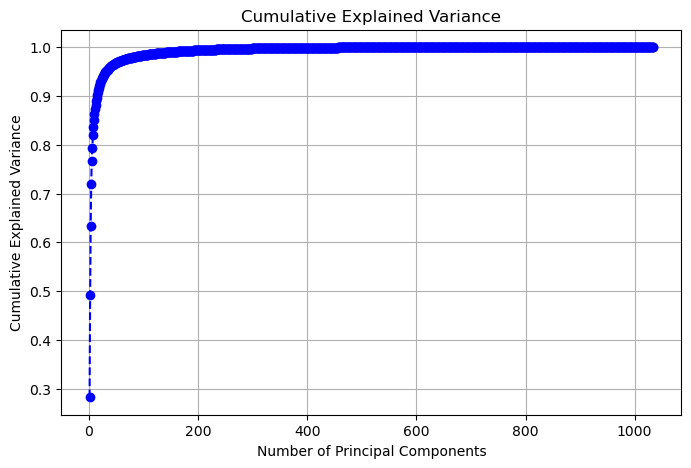

Optimum Number of Components: 32
Compressed File Size: 531.47 KB


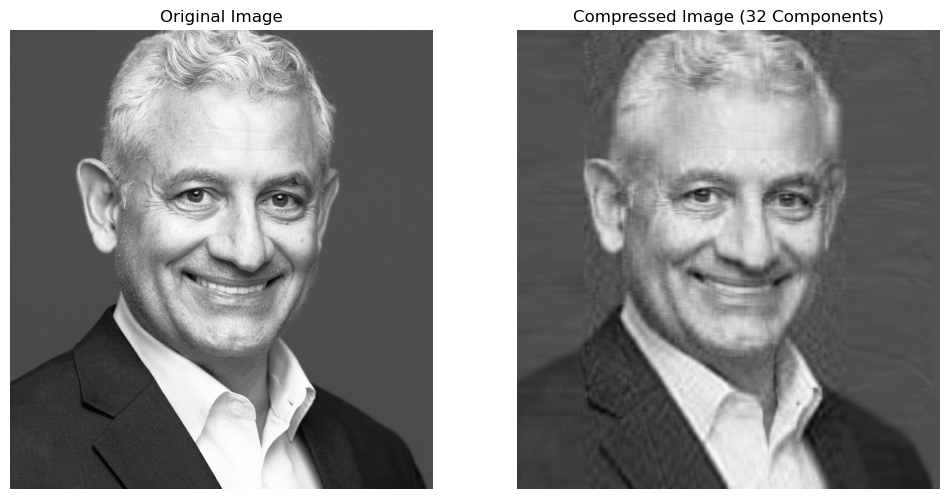

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io
import os

# Load a locally stored image (replace 'image.png' with your image file name)
image_path = 'image.png'
image = io.imread(image_path, as_gray=True)

# Calculate the original file size
original_size = os.path.getsize(image_path) / 1024  # Size in KB
print(f"Original File Size: {original_size:.2f} KB")

# Function to compress the image using PCA
def compress_image(image, num_components):
    pca = PCA(n_components=num_components)
    transformed = pca.fit_transform(image)
    reconstructed = pca.inverse_transform(transformed)  # Reconstruct the image
    return reconstructed, pca

# Function to save the compressed image
def save_compressed_image(compressed_image, output_path):
    plt.imsave(output_path, compressed_image, cmap='gray')
    compressed_size = os.path.getsize(output_path) / 1024  # Size in KB
    return compressed_size

# Find the optimum number of components
pca_full = PCA().fit(image)  # Fit PCA to the full dataset
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine number of components to retain ~95% variance
optimum_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimum Number of Components: {optimum_components}")

# Apply PCA with the optimum number of components
compressed_image, _ = compress_image(image, optimum_components)

# Save and calculate the size of the compressed image
compressed_image_path = 'compressed_image.png'
compressed_size = save_compressed_image(compressed_image, compressed_image_path)
print(f"Compressed File Size: {compressed_size:.2f} KB")

# Display the original and compressed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image ({optimum_components} Components)')
plt.axis('off')
plt.show()


## PCA Image Compression on Olivetti Faces Dataset

Dataset: The Olivetti dataset has 400 grayscale images of 40 individuals (10 images per person). Images are 64x64 pixels, flattened into 1D arrays of size 4096.

PCA for Dimensionality Reduction: PCA reduces the data from 4096 dimensions to n_components=100, extracting the most significant features of the faces (eigenfaces).

Insights: Compression: PCA greatly reduces the computational cost by working in a lower-dimensional space.


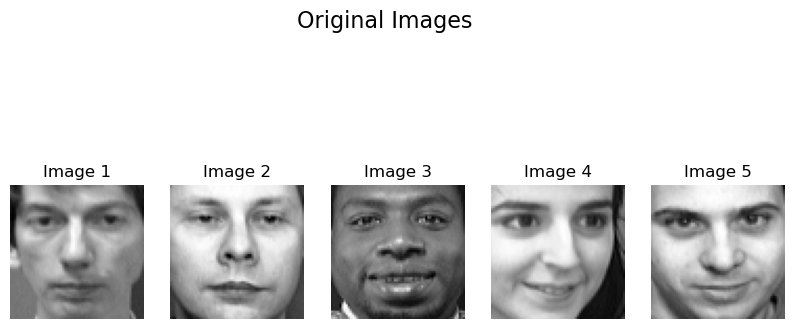

Cumulative Explained Variance with 50 components: 0.87


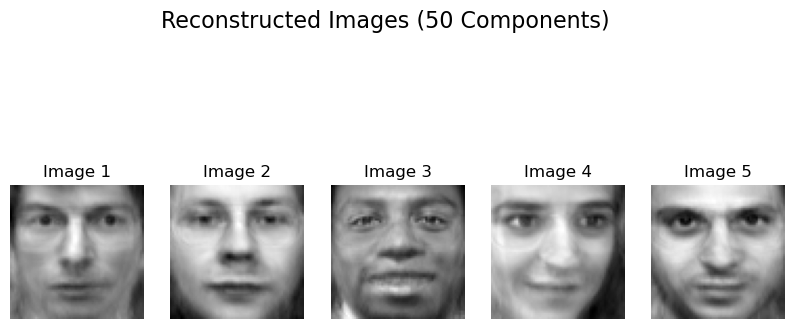

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces Dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
images = data.images  # Original images (400 images, 64x64 pixels each)
X = data.data  # Flattened image data (400 rows, 4096 columns)

# Display some original images
plt.figure(figsize=(10, 5))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i}")
plt.suptitle("Original Images", fontsize=16)
plt.show()

# Apply PCA to reduce dimensions
n_components = 50  # Number of principal components to retain
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X)  # Transformed data (compressed representation)
X_reconstructed = pca.inverse_transform(X_pca)  # Reconstructed images

# Display the explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative Explained Variance with {n_components} components: {cumulative_variance[-1]:.2f}")

# Display some compressed (reconstructed) images
plt.figure(figsize=(10, 5))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(X_reconstructed[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i}")
plt.suptitle(f"Reconstructed Images ({n_components} Components)", fontsize=16)
plt.show()


## PCA with Facial Recognition on olivetti_faces Dataset

Use PCA for dimensionality reduction and a simple classifier (like k-nearest neighbors) to recognize faces based on the Olivetti Faces Dataset. 

The basic idea is to reduce the dimensionality using PCA (extracting "eigenfaces") and then train a classifier to predict the person associated with a given face.

- Dataset:The Olivetti dataset has 400 grayscale images of 40 individuals (10 images per person). Images are 64x64 pixels, flattened into 1D arrays of size 4096.

- PCA for Dimensionality Reduction: PCA reduces the data from 4096 dimensions to n_components=100, extracting the most significant features of the faces (eigenfaces).

- Classifier: A k-nearest neighbors (KNN) classifier is trained on the PCA-transformed data. Each test image is classified based on its proximity to the training examples in the PCA space.

- Evaluation: The model’s performance is evaluated using accuracy and a classification report. The visualization shows test images alongside the predicted labels.

Insights:
- Compression: PCA greatly reduces the computational cost by working in a lower-dimensional space.
- Recognition Accuracy: With 100 components, you should achieve ~90% accuracy on the Olivetti dataset.

Applications: This approach is similar to how early facial recognition systems worked, using eigenfaces for identifying individuals.

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       0.75      1.00      0.86         3
           3       0.50      1.00      0.67         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       0.75      1.00      0.86         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.0

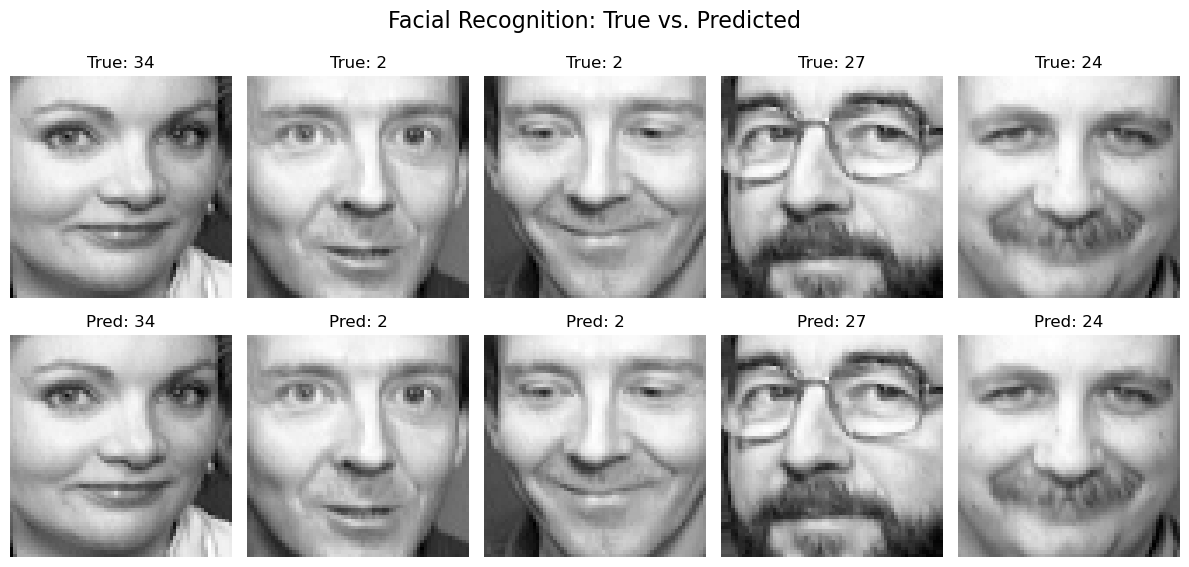

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the Olivetti Faces Dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data  # Flattened image data (400 rows, 4096 columns)
y = data.target  # Labels (40 unique individuals, 10 images each)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142, stratify=y)

# Apply PCA to reduce dimensions
n_components = 100  # Number of principal components
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)  # Fit PCA on training data
X_test_pca = pca.transform(X_test)       # Transform test data

# Train a KNN classifier on the PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=3)  # Use 3 nearest neighbors
knn.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize some test images with their predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_test[i]}")

    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {y_pred[i]}")

plt.suptitle("Facial Recognition: True vs. Predicted", fontsize=16)
plt.tight_layout()
plt.show()


# Neural Networks
A neural network is a machine learning model inspired by the human brain's structure and function. It consists of layers of interconnected nodes (neurons), which process and transform input data to learn patterns and make predictions. Neural networks are highly effective for solving problems like image recognition, natural language processing, and time-series analysis.

Key Components:
- Input Layer: Takes input data and passes it to the network.
- Hidden Layers: Perform intermediate computations and extract features.
- Output Layer: Provides the model's predictions (e.g., probabilities or labels).
- Activation Functions: Non-linear functions like ReLU, Sigmoid, or Softmax that help the network learn complex patterns

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

# Generate a synthetic dataset
X, y = make_moons(n_samples=3000, noise=0.1, random_state=1234)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Standardize the data for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network
model = Sequential([
    Dense(10, input_dim=2, activation='relu'),  # Hidden layer with 10 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy:", accuracy)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 0.8, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 1.4, X[:, 1].max() + 0.8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.title('Neural Network Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Convolutional Neural Networks

Dataset: The MNIST dataset of handwritten digits (0-9) is loaded. It contains grayscale images of size 28x28.
Data is normalized (pixel values scaled between 0 and 1) and reshaped for the CNN input.

CNN Architecture:
Convolution Layer: Extracts features from the images using 32 filters of size 3x3.
MaxPooling Layer: Reduces the spatial dimensions to focus on the most important features.
Flatten Layer: Flattens the 2D feature maps into a 1D array.
Fully Connected Layers: Combines features to make predictions (softmax activation for classification into 10 categories).

Training and Evaluation:
Trains the model for 5 epochs with a batch size of 32.
Evaluates the model's accuracy on test data.

Visualization:
Displays 10 test images along with their predicted labels.

Output:
The trained CNN predicts digit classes from test images.
The model's accuracy on the test set provides an indication of its performance.
A grid of images is shown, each with the model's prediction as the title

In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255  # Reshape and normalize
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255    # Reshape and normalize
y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)    # One-hot encode labels

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Flatten(),  # Flatten the 2D arrays into 1D
    Dense(128, activation='relu'),  # Fully connected dense layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Plot some test images with predictions
predictions = model.predict(X_test[:10])
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Pred: {np.argmax(predictions[i])}")
plt.show()


# Recurrent Neural Networks
Example RNN for sequence classification using Keras library and IMDB sentiment dataset.

The IMDB dataset contains reviews labeled as positive (1) or negative (0).
Words are represented as integers, and sequences are padded to a fixed length (max_length) for consistency.

RNN Architecture:
- Embedding Layer: Maps integers (word indices) to dense vectors of fixed size.
- SimpleRNN Layer: Processes sequential data, learning temporal patterns and dependencies in the review text.
- Dense Layer: Outputs a single value (using Sigmoid activation) for binary classification.

Training: The model is trained for 5 epochs, and accuracy is used as the metric for performance.

Visualization: A line plot is generated to show how training and validation accuracy change over epochs.

In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the IMDB dataset
vocab_size = 10000  # Limit the vocabulary size to the top 10,000 words
max_length = 100    # Limit each review to 100 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocess the data (pad sequences to have the same length)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Build the RNN model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),  # Embedding layer
    SimpleRNN(32, activation='tanh'),                   # Simple RNN layer
    Dense(1, activation='sigmoid')                      # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()


# LSTM (Long Short-Term Memory) network
RNN  is well-suited for sequential data, for sentiment analysis on the IMDB dataset containing movie reviews classified as positive (1) or negative (0). Reviews are padded to ensure all sequences have the same length.

LSTM Architecture: 
- Embedding Layer: Converts word indices into dense vectors of fixed size.
- LSTM Layer: Captures long-term dependencies in the sequential data. The return_sequences=False makes it output a single vector (last hidden state).
- Dense Layer: Outputs a single value using the Sigmoid activation function for binary classification.

Training and Evaluation: The model is trained for 5 epochs, and accuracy is tracked on both training and validation sets.

Visualization: A line plot shows how training and validation accuracy change over epochs.

In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the IMDB dataset
vocab_size = 10000  # Limit vocabulary size to top 10,000 words
max_length = 100    # Limit reviews to 100 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocess the data (pad sequences to have the same length)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Build the LSTM model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),  # Embedding layer
    LSTM(64, return_sequences=False, activation='tanh'),  # LSTM layer with 64 units
    Dense(1, activation='sigmoid')                       # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()
